<a href="https://colab.research.google.com/github/agaafra/Machine-Learning-Projects/blob/main/Predicting_the_Baltimore_Salary_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the Baltimore Salary
In this project, my aim is to develop and evaluate machine learning models for predicting several jobs salary in Baltimore, using Support Vector Regression.
The Salary prediction dataset used for this research has 742 entries and is derived from Kaggle. It is a compilation of jobs from July 1st, 2013 through June 30th, 2014. It includes only those employees who are employed on June 30, 2014. This dataset can be used to predict salary based on several features for instance, age, company size etc.
* [Link to Dataset](https://raw.githubusercontent.com/Lochana24/Baltimore-Salary-Prediction/main/train.csv)

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

##Import Dataset

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Lochana24/Baltimore-Salary-Prediction/main/train.csv')

## Data Analysis

In [5]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [6]:
df.tail()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12
18980,"Zukowski,Charles J",Waste Water Tech Supv I Pump,A50206,DPW-Water & Waste Water,10/15/1979,$53568.00,$52164.32


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [8]:
df.shape

(18981, 7)

In [9]:
df.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Battle,Daron J",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


In [10]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

##Data Cleaning and Data Manipulation

In [11]:
#I'll make a copy of the original DataFrame
newdf = df.copy()

In [12]:
#As observed from the list of column, there exists spaces in front or end of the names,
#Hence, I will remove the leading & trailing spaces and converting all the columns into the lowercase

newdf.columns = newdf.columns.str.strip().str.lower()

In [13]:
print(newdf.columns)
newdf.head()

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary',
       'grosspay'],
      dtype='object')


,name,jobtitle,agencyid,agency,hiredate,annualsalary,grosspay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [14]:
#Checking for null values
newdf.isnull().sum()

name               0
jobtitle           0
agencyid           0
agency             0
hiredate          70
annualsalary       0
grosspay        3223
dtype: int64

In [15]:
#Now, I will drop the grosspay column since it's superfluous currently
newdf.drop('grosspay', axis=1, inplace=True)

In [16]:
#Here, I am searching for the number of agencies and their agencyid 
newdf[['agency','agencyid']].value_counts()

agency                   agencyid
R&P-Recreation (part-ti  P04001      316
TRANS-Crossing Guards    C90786      276
Youth Summer             W02629      193
R&P-Recreation (part-ti  P04002      191
Police Department        A99416      166
                                    ... 
Youth Summer             W02502        1
Youth Summer             W02676        1
                         W02678        1
                         W02679        1
R&P-Parks (wkly)         B68080        1
Length: 1177, dtype: int64

In [17]:
#Various Job titles
newdf.jobtitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
VEHICLE DAMAGE INVESTIGATOR          1
Community Health Nurse I             1
ACCOUNTING SYSTEMS ANALYST           1
DESK TOP PUBLISHING COORDINATO       1
Research Analyst II                  1
Name: jobtitle, Length: 1075, dtype: int64

In [18]:
#Now I will remove the '$' from the annualsalary column and change the dtype to integer to make processes easier

newdf['annualsalary'] = newdf.annualsalary.str.strip('$').astype(float)

In [19]:
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0


In [20]:
#In this step, I will create 3 new columns -hireday, hiremonth, hireyear, by splitting hiredate column

newdf[["hireday", "hiremonth", "hireyear"]] = newdf["hiredate"].str.split("/", expand = True)


In [21]:
newdf["hireday"]=pd.to_numeric(newdf["hireday"])
newdf["hiremonth"]=pd.to_numeric(newdf["hiremonth"])
newdf["hireyear"]=pd.to_numeric(newdf["hireyear"])

In [22]:
newdf["hireday"].fillna(newdf["hireday"].mean(), inplace=True)
newdf["hiremonth"].fillna(newdf["hiremonth"].mean(), inplace=True)
newdf["hireyear"].fillna(newdf["hireyear"].mean(), inplace=True)

In [23]:
newdf.rename(columns = {'hireday':'hiremonth','hiremonth':'hireday'}, inplace = True)

In [24]:
newdf.astype({"hireday":'int', "hiremonth":'int','hireyear':'int'}) 

,name,jobtitle,agencyid,agency,hiredate,annualsalary,hiremonth,hireday,hireyear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,6,10,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,10,24,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,9,25,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,7,23,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,7,24,2013
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310.0,5,21,2014
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310.0,5,21,2014
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999.0,12,17,2013
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,44104.0,1,23,2013


## Data Visualization

Text(0.5, 1.0, 'AnnualSalary')

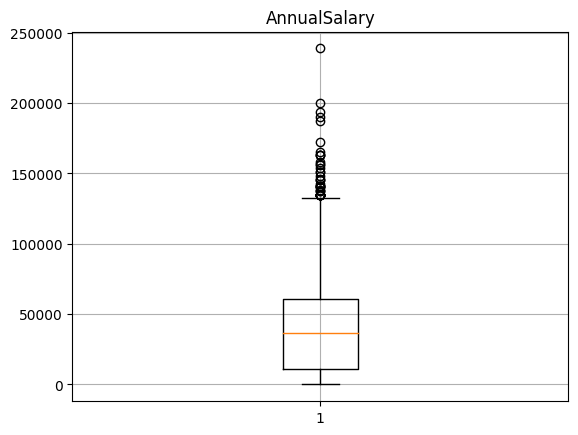

In [25]:
#Here, I will plot a boxplot for the annualsalary column in order to determine the outliers
plt.boxplot(newdf.annualsalary)
plt.grid()
plt.title('AnnualSalary')

The plot shows that most salaries range between around 20K to 60k

Text(0, 0.5, 'Number of Employees')

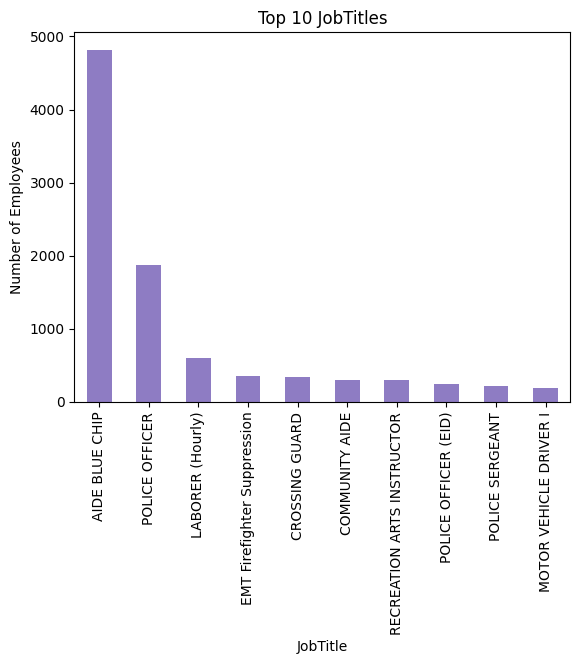

In [26]:
#Next, I will find the top 10 jobs based on Employment
newdf.groupby(['jobtitle'])['name'].count().sort_values(ascending=False).head(10).plot.bar(color='#8e7cc3')
plt.title('Top 10 JobTitles')
plt.xlabel('JobTitle')
plt.ylabel('Number of Employees')


Text(0.5, 1.0, 'Top 10 Highest Paying Jobs')

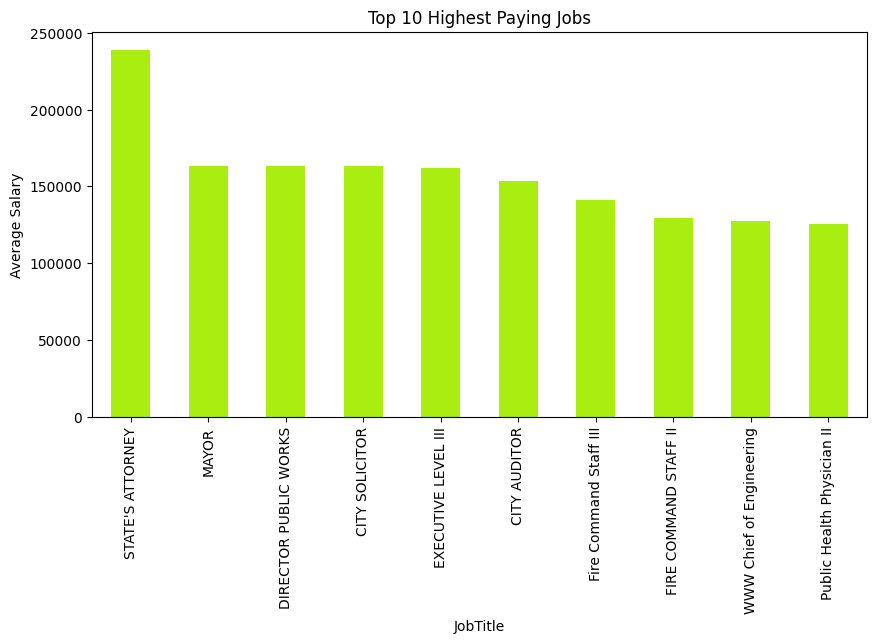

In [27]:
#Here I will find the top 10 jobs with the highest salary
plt.figure(figsize=(10,5))
newdf.groupby(['jobtitle'])['annualsalary'].mean().sort_values(ascending=False).head(10).plot.bar(color='#aaed10')
plt.xlabel('JobTitle')
plt.ylabel('Average Salary')
plt.title('Top 10 Highest Paying Jobs')

Text(0, 0.5, 'Number of Employees')

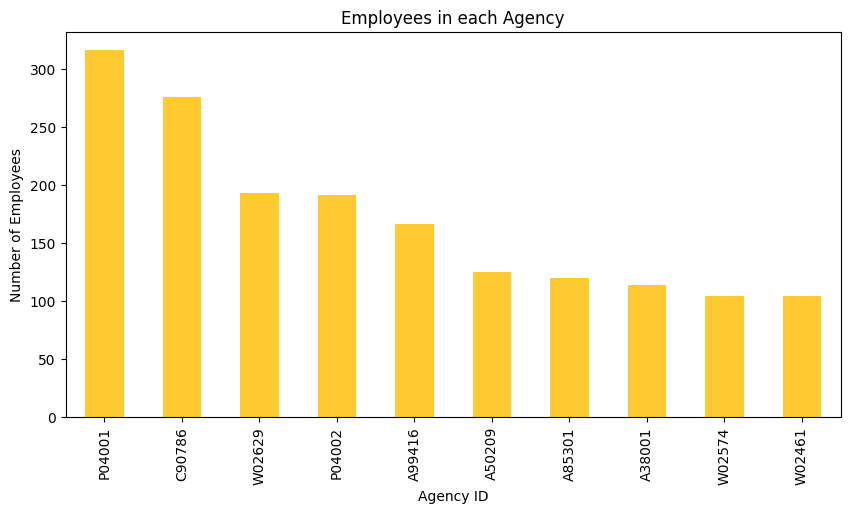

In [28]:
# Next, I will plot top 10 Agency's ID that has highest number of Employees
plt.figure(figsize=(10,5))
newdf.groupby(['agencyid'])['name'].count().sort_values(ascending=False).head(10).plot.bar(color='#ffca31')
plt.title('Employees in each Agency')
plt.xlabel('Agency ID')
plt.ylabel('Number of Employees')

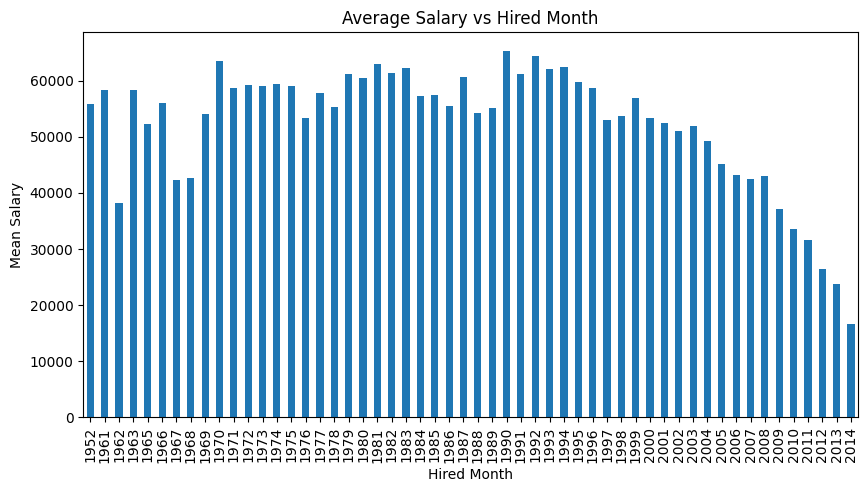

In [34]:
# Plot Highest Salary V/s Year graph
plt.figure(figsize=(10,5))
newdf.groupby(['hireyear'])['annualsalary'].mean().plot.bar()
plt.xlabel('Hired Month')
plt.ylabel('Mean Salary')
plt.title('Average Salary vs Hired Month')
plt.show()

The above graph shows us how there is an increase in the sum of annual salaries each year

Text(0, 0.5, 'Number of Employees')

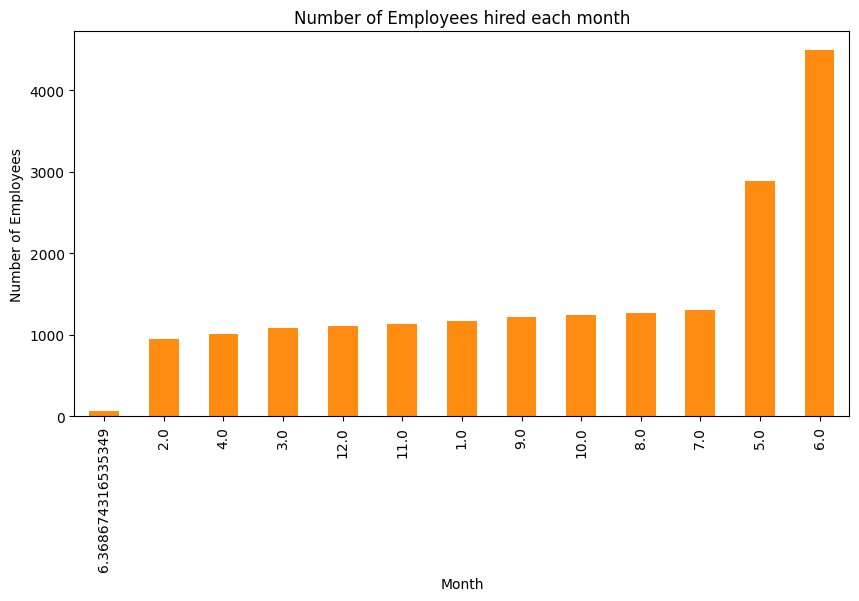

In [ ]:
# Here I want to check on which month most of the people are hired
plt.figure(figsize=(10,5))
newdf.hiremonth.value_counts().sort_values().plot.bar(color='#ff8b11')
plt.title('Number of Employees hired each month')
plt.xlabel('Month')
plt.ylabel('Number of Employees')

We can see that, the month of June and then May have the mose number of hirings, with Feb and April being the least

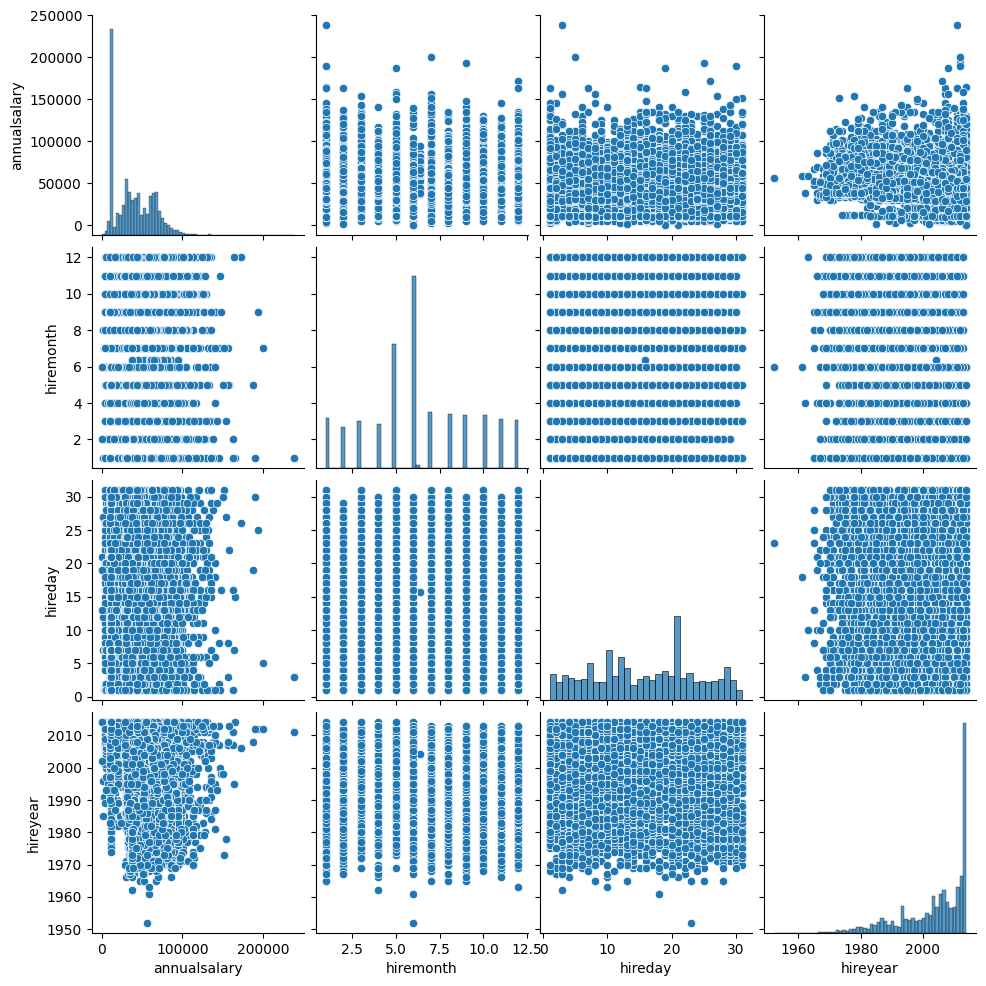

In [ ]:
sns.pairplot(newdf)

<ipython-input-34-539d396bed67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(newdf.corr(), annot=True)


<Axes: >

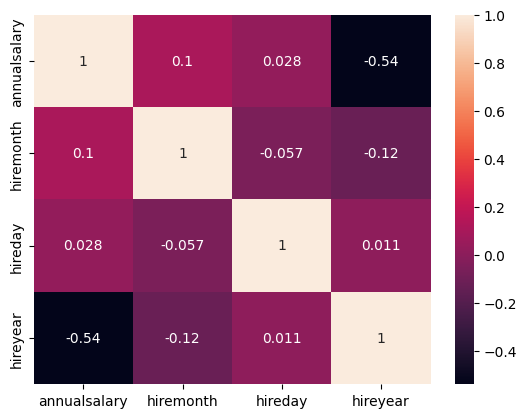

In [ ]:
sns.heatmap(newdf.corr(), annot=True)

We can observe that columns hireday and hiremonth have considerable amount of effect on the annualsalary

##Machine Learning

### Data Preprocessing - Standard Scaler

* Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [ ]:
scale_data = newdf.copy()

In [ ]:
scale_data.drop(['hiredate','name',],axis=1,inplace=True)

In [ ]:
scale_data.head()

,jobtitle,agencyid,agency,annualsalary,hiremonth,hireday,hireyear
0,AIDE BLUE CHIP,W02200,Youth Summer,11310.0,6.0,10.0,2013.0
1,Facilities/Office Services II,A03031,OED-Employment Dev,53428.0,10.0,24.0,1979.0
2,ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,68300.0,9.0,25.0,2006.0
3,EPIDEMIOLOGIST,A65026,HLTH-Health Department,62000.0,7.0,23.0,2009.0
4,POLICE OFFICER TRAINEE,A99416,Police Department,43999.0,7.0,24.0,2013.0


In [ ]:
scale_data.annualsalary

0        11310.0
1        53428.0
2        68300.0
3        62000.0
4        43999.0
          ...   
18976    11310.0
18977    11310.0
18978    43999.0
18979    44104.0
18980    53568.0
Name: annualsalary, Length: 18981, dtype: float64

In [ ]:
# Mean encoding JobTitle, i.e. map JobTitle to its mean salary 
encoded_jobtitle=scale_data.groupby('jobtitle')['annualsalary'].mean()
scale_data['jobtitle']=scale_data['jobtitle'].map(encoded_jobtitle)
# print(master_df['JobTitle'])


# Mean encoding Agency, i.e. map Agency to its mean salary 
encoded_agency=scale_data.groupby('agency')['annualsalary'].mean()
scale_data['agency']=scale_data['agency'].map(encoded_agency)
# print(master_df['Agency'])

# Mean encoding AgencyID, i.e. map AgencyID to its mean salary 
encoded_agencyid=scale_data.groupby('agencyid')['annualsalary'].mean()
scale_data['agencyid']=scale_data['agencyid'].map(encoded_agencyid)
# print(master_df['AgencyID'])
     

In [ ]:
X = np.array(scale_data.drop(columns=['annualsalary']))
y = np.array(scale_data.annualsalary)

In [ ]:
X

array([[1.13139672e+04, 1.13100000e+04, 1.13102706e+04, 6.00000000e+00,
        1.00000000e+01, 2.01300000e+03],
       [4.74435000e+04, 4.66670000e+04, 5.14954242e+04, 1.00000000e+01,
        2.40000000e+01, 1.97900000e+03],
       [6.97506667e+04, 6.59261333e+04, 6.53603073e+04, 9.00000000e+00,
        2.50000000e+01, 2.00600000e+03],
       ...,
       [4.45311605e+04, 4.40123072e+04, 6.16709203e+04, 1.20000000e+01,
        1.70000000e+01, 2.01300000e+03],
       [6.05881393e+04, 6.02033404e+04, 6.16709203e+04, 1.00000000e+00,
        2.30000000e+01, 2.01300000e+03],
       [5.33684286e+04, 4.24075625e+04, 4.25655131e+04, 1.00000000e+01,
        1.50000000e+01, 1.97900000e+03]])

In [ ]:
sc = StandardScaler()

In [ ]:
sc.fit_transform(X,y)
#scaled_df = pd.DataFrame(scaled_data,
                         #columns=['annualsalary','hireday',	'hiremonth',	'hireyear'])

array([[-1.15554384, -1.26956028, -1.34693064, -0.12523107, -0.68862486,
         0.86001322],
       [ 0.31228713,  0.30839771,  0.55581923,  1.2334865 ,  0.98347912,
        -2.41744468],
       [ 1.2185582 ,  1.16791926,  1.21231552,  0.8938071 ,  1.10291512,
         0.18524248],
       ...,
       [ 0.1939678 ,  0.18992065,  1.03762462,  1.91284528,  0.14742713,
         0.86001322],
       [ 0.8463131 ,  0.91251505,  1.03762462, -1.82362802,  0.86404312,
         0.86001322],
       [ 0.55299862,  0.11830202,  0.13299175,  1.2334865 , -0.09144486,
        -2.41744468]])

### Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train

array([[4.24764948e+04, 4.26007228e+04, 4.57633059e+04, 9.00000000e+00,
        2.80000000e+01, 2.00600000e+03],
       [4.76123061e+04, 5.04580702e+04, 4.79144320e+04, 1.00000000e+00,
        3.10000000e+01, 2.00200000e+03],
       [6.05881393e+04, 6.85710364e+04, 6.16709203e+04, 1.10000000e+01,
        2.90000000e+01, 2.00400000e+03],
       ...,
       [4.59804407e+04, 4.91320370e+04, 4.73569953e+04, 6.00000000e+00,
        9.00000000e+00, 2.01400000e+03],
       [2.33095652e+04, 2.20196297e+04, 2.12365227e+04, 6.00000000e+00,
        2.60000000e+01, 2.00600000e+03],
       [3.04725085e+04, 3.42477755e+04, 3.41724897e+04, 1.20000000e+01,
        4.00000000e+00, 2.00900000e+03]])

In [ ]:
X_test

array([[1.02192908e+04, 1.02720435e+04, 1.02345353e+04, 9.00000000e+00,
        6.00000000e+00, 2.00700000e+03],
       [1.13139672e+04, 1.13100000e+04, 1.13102706e+04, 6.00000000e+00,
        1.20000000e+01, 2.01200000e+03],
       [3.51213636e+04, 3.78769667e+04, 3.78769667e+04, 2.00000000e+00,
        2.00000000e+00, 1.99500000e+03],
       ...,
       [1.13139672e+04, 1.13100000e+04, 1.13102706e+04, 6.00000000e+00,
        3.00000000e+00, 2.01000000e+03],
       [3.51762000e+04, 3.84268750e+04, 3.84268750e+04, 6.00000000e+00,
        2.50000000e+01, 2.00800000e+03],
       [8.22931212e+04, 6.92575789e+04, 7.10728491e+04, 8.00000000e+00,
        9.00000000e+00, 1.98200000e+03]])

In [ ]:
y_test

array([10038., 11310., 37694., ..., 11310., 35506., 86247.])

In [ ]:
y_train

array([40544., 50050., 61788., ..., 38537., 41600., 31427.])

### Choosing the model

* Here, I am using the Support Vector Regression (SVR) as my model

In [ ]:
model = SVR()

### Training the model

In [ ]:
model.fit(X_train,y_train)

SVR()

### Testing the model

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
X_test

array([[1.02192908e+04, 1.02720435e+04, 1.02345353e+04, 9.00000000e+00,
        6.00000000e+00, 2.00700000e+03],
       [1.13139672e+04, 1.13100000e+04, 1.13102706e+04, 6.00000000e+00,
        1.20000000e+01, 2.01200000e+03],
       [3.51213636e+04, 3.78769667e+04, 3.78769667e+04, 2.00000000e+00,
        2.00000000e+00, 1.99500000e+03],
       ...,
       [1.13139672e+04, 1.13100000e+04, 1.13102706e+04, 6.00000000e+00,
        3.00000000e+00, 2.01000000e+03],
       [3.51762000e+04, 3.84268750e+04, 3.84268750e+04, 6.00000000e+00,
        2.50000000e+01, 2.00800000e+03],
       [8.22931212e+04, 6.92575789e+04, 7.10728491e+04, 8.00000000e+00,
        9.00000000e+00, 1.98200000e+03]])

In [ ]:
y_test

array([10038., 11310., 37694., ..., 11310., 35506., 86247.])

In [ ]:
target = pd.DataFrame({'Actual':y_test,
                       "Predicted":y_pred})

Text(0, 0.5, 'Predicted')

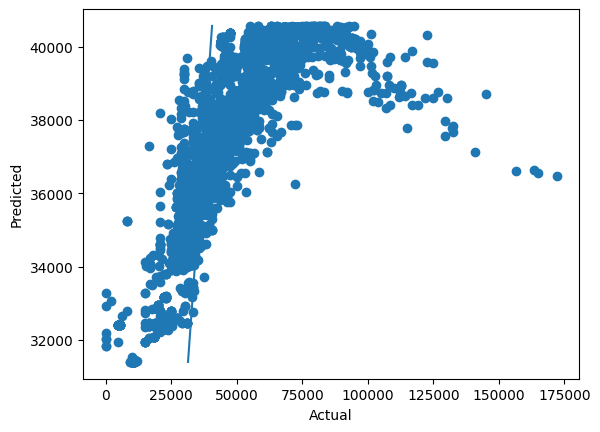

In [ ]:
plt.scatter(y_test,y_pred)
plt.plot([min(y_pred),max(y_pred)],[min(y_pred),max(y_pred)])
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: >

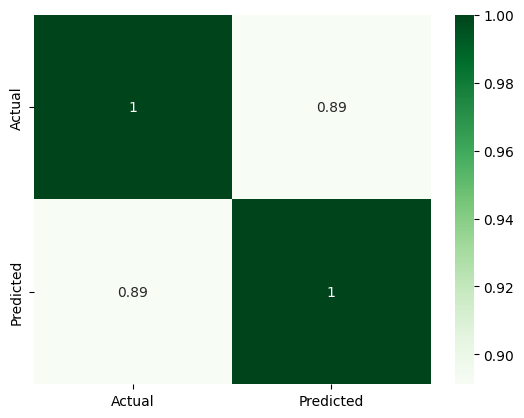

In [ ]:
sns.heatmap(target.corr(),annot=True,cmap='Greens')

### Performance

In [ ]:
r2_score(y_test, y_pred)
#  mean_squared_error, mean_absolute_error

0.2070146170005357

In [ ]:
model.score(X_train,y_train)

0.21197311203779978

In [ ]:
model.score(X_test,y_test)

0.2070146170005357

* Since the model score is weak, I am going to try build the Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
regressor.score(X_train,y_train)

0.9610251021151642

In [ ]:
regressor.score(X_test,y_test)

0.9681517185674652

Pretty good accuracy

### Error

In [ ]:
#Check error in Training model
mean_squared_error(y_test,y_pred)


507293133.11507404

In [ ]:
mean_absolute_error(y_test,y_pred)

17961.959290188748